<a href="https://colab.research.google.com/github/idrissdeme/Aulas-Python-IRD/blob/main/C%C3%B3pia_de_Curso_Verao_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link para a apresentação: [shorturl.at/mnRV1](http://shorturl.at/mnRV1)

Link para a [competição](https://docs.google.com/spreadsheets/d/15EyAeCgNEo0tQ4YkFMMoJvf4TK6u5fP7a6LvjNkZ-ro/edit?usp=sharing)

Quem conseguirá a melhor acurácia no problema de classificação de dígitos?

# Aula nova, rede nova!

### Vamos criar nossa primeira rede para reconhecer dígitos


---


Para isso vamos usar:


*   Dados: MNIST 
 * Conjunto de imagens com dígitos escritos à mão ([MNIST Wikipedia](https://en.wikipedia.org/wiki/MNIST_database))
 * Recorde: 99.91 % de acurácia ([recordes](https://paperswithcode.com/sota/image-classification-on-mnist))



*   Keras
 * Já tem o MNIST ⛳
 * Já sabemos um pouco de Keras da aula passada 🛫
 * É intuitivo 🥇



---





Carregando os dados...

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


##*Sempre* examine os dados antes de usá-los

In [ ]:
print('Treino:')
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print(y_train)

print('\nTeste:')
print(x_test.shape, x_test.dtype)
print(y_test.shape, y_test.dtype)
print(y_test)

img_shape = x_train[0].shape
img_size = np.prod(img_shape)

print('Dimensões da imagem:', img_shape)
print('Tamanho da imagem:', img_size)

Treino:
(60000, 28, 28) uint8
(60000,) uint8
[5 0 4 ... 5 6 8]

Teste:
(10000, 28, 28) uint8
(10000,) uint8
[7 2 1 ... 4 5 6]
Dimensões da imagem: (28, 28)
Tamanho da imagem: 784


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

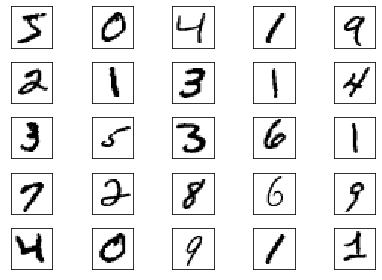

In [ ]:
nx, ny = 5, 5

for i in range(nx*ny):
  plt.subplot(nx, ny, i+1)
  plt.imshow(x_train[i], cmap='gray_r', interpolation='none')
  plt.xticks([])
  plt.yticks([])
  #plt.xlabel('label: %d' % y_train[i])

plt.tight_layout()

Como é a distribuição dos dados?

Distribuição dos diferentes labels/classes/categorias/dígitos:

treino:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]

teste:
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
[0.098  0.1135 0.1032 0.101  0.0982 0.0892 0.0958 0.1028 0.0974 0.1009]

ideal: 0.1 (10 %)

Histograma:


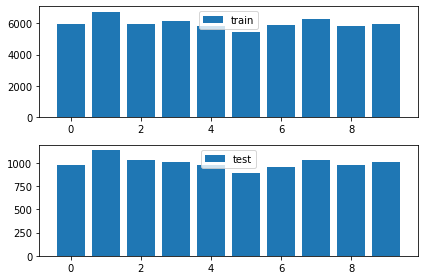

In [ ]:
train_labels_count = np.unique(y_train, return_counts=True)
test_labels_count = np.unique(y_test, return_counts=True)

labels = np.unique(np.concatenate((train_labels_count[0], test_labels_count[0])))
n_labels = len(labels)

train_labels_dist = train_labels_count[1] / len(y_train)
test_labels_dist = test_labels_count[1] / len(y_test)

ideal_dist = 1 / n_labels

print('Distribuição dos diferentes labels/classes/categorias/dígitos:\n')
print('treino:')
print(train_labels_count)
print(train_labels_dist)
print('\nteste:')
print(test_labels_count)
print(test_labels_dist)
print('\nideal: %g (%g %%)' % (ideal_dist, 100*ideal_dist))

print('\nHistograma:')
plt.subplot(2, 1, 1)
plt.bar(*train_labels_count, label='train')
plt.legend()
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.bar(*test_labels_count, label='test')
plt.legend()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x7f73bec2c190>,
 <a list of 10 Text major ticklabel objects>)

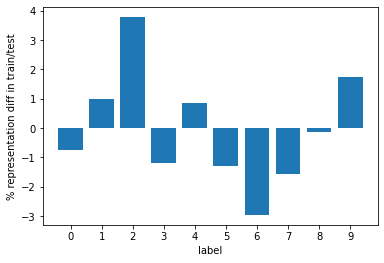

In [ ]:
plt.bar(labels, 100*(1 - train_labels_dist / test_labels_dist))
plt.ylabel('% representation diff in train/test')
plt.xlabel('label')
plt.xticks(labels)

Os dados estão igualmente representados nos conjuntos de treino e teste?

Que outras análises você faria?



---


## Vamos transformar os labels ou categorias para um formato codificado "tipo binário"
O one hot encoding, isso facilita (para o computador) a representação das categorias em problemas de classificação:

0 ⟶ 0001

1 ⟶ 0010

2 ⟶ 0100

... e assim vai

https://en.wikipedia.org/wiki/One-hot

In [ ]:
# transforma para a codificação one-hot
Y_train = tf.keras.utils.to_categorical(y_train, n_labels)
Y_test = tf.keras.utils.to_categorical(y_test, n_labels)

print('Treino:')
print(Y_train)

print('Teste:')
print(Y_test)

Treino:
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Teste:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]




---


##Agora, vamos treinar uma rede pra reconhecer números manuscritos!

In [ ]:
# meu primeiro modelo keras <3

# quantas camadas?
# quantos neurônios em cada camada?
# qual função de ativação?

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=img_shape),  # colocando a matriz da imagem em forma de vetor
  tf.keras.layers.Rescaling(scale=1./255),         # normalizando de [0, 255] para [0.0, 1.0] (você incluiria aqui na rede ou faria antes, como preprocessamento?)
  # complete com camadas da sua preferência
  # tipos de camada (sugiro que fique com "Dense" por enquanto): 
  #   - https://www.tensorflow.org/api_docs/python/tf/keras/layers
  # funções de ativação: 
  #   - https://www.tensorflow.org/api_docs/python/tf/keras/activations 
  #   - https://www.tensorflow.org/api_docs/python/tf/nn 
  #   - https://www.tensorflow.org/api_docs/python/tf/math
  # se quiser entrar na toca do coelho:
  #   - https://www.tensorflow.org/api_docs/python/tf/keras/initializers
  #   - https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
  #       + https://en.wikipedia.org/wiki/Regularization_(mathematics)
  #       + https://ml-cheatsheet.readthedocs.io/en/latest/regularization.html (teste dropout ;D)
  # ...
  # ...
  tf.keras.layers.Dense(80, activation=tf.nn.leaky_relu),
  tf.keras.layers.Dense(40, activation=tf.nn.leaky_relu),
  # ...
  # ...
  # na última camada precisamos de um nº de neurônios = nº de labels/categorias/classes (10 no nosso caso):
  # pode trocar a ativação se quiser
  tf.keras.layers.Dense(n_labels, activation='linear'),
  # vamos conerter a saída numa distribuição de probabilidades: (https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax)
  tf.keras.layers.Softmax()
])

print(model.summary())

for layer in model.layers:
  print(layer.get_config())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_6 (Rescaling)     (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 80)                62800     
                                                                 
 dense_16 (Dense)            (None, 40)                3240      
                                                                 
 dense_17 (Dense)            (None, 10)                410       
                                                                 
 softmax_6 (Softmax)         (None, 10)                0         
                                                                 
Total params: 66,450
Trainable params: 66,450
Non-trai

In [ ]:
# função perda (loss)
#  - https://www.tensorflow.org/api_docs/python/tf/keras/losses
my_loss = tf.keras.losses.CategoricalCrossentropy( 
    from_logits=True,
)

# lista de métricas que serão monitoradas (e armazenadas) durante a otimização
#  - https://www.tensorflow.org/api_docs/python/tf/keras/metrics
#  - https://en.wikipedia.org/wiki/Confusion_matrix                # nunca mais se confunda com a matriz confusão!
my_metrics = [
    tf.keras.metrics.CategoricalAccuracy(),
    #tf.keras.metrics.Precision(),
    #tf.keras.metrics.Recall(),
    #tf.keras.metrics.TruePositives(),
    #tf.keras.metrics.FalseNegatives(),
    # coloque suas métricas desejadas aqui ...
]

# Taxa de aprendizado (learning rate)
#  - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules
lr = 1e-3

# Algoritmo de otimização (você pode testar outros)
#  - https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
my_optimizer = tf.keras.optimizers.Adam(
    learning_rate=lr,
)


# compila o modelo
model.compile(
    loss=my_loss,
    optimizer=my_optimizer,
    metrics=my_metrics,
)

In [ ]:
# Escolha o número de épocas pelas quais você quer treinar e o tamanho do lote (batch size)
n_epochs = 100
my_batch_size = 100

history = model.fit(
    x_train, Y_train,
    batch_size=my_batch_size,
    epochs=n_epochs,
    verbose=2,
    validation_data=(x_test, Y_test)
)

Epoch 1/100
600/600 - 4s - loss: 1.6199 - categorical_accuracy: 0.8587 - val_loss: 1.5409 - val_categorical_accuracy: 0.9268 - 4s/epoch - 7ms/step
Epoch 2/100
600/600 - 2s - loss: 1.5338 - categorical_accuracy: 0.9330 - val_loss: 1.5243 - val_categorical_accuracy: 0.9397 - 2s/epoch - 4ms/step
Epoch 3/100
600/600 - 2s - loss: 1.5199 - categorical_accuracy: 0.9453 - val_loss: 1.5200 - val_categorical_accuracy: 0.9439 - 2s/epoch - 4ms/step
Epoch 4/100
600/600 - 2s - loss: 1.5115 - categorical_accuracy: 0.9531 - val_loss: 1.5105 - val_categorical_accuracy: 0.9522 - 2s/epoch - 4ms/step
Epoch 5/100
600/600 - 2s - loss: 1.5054 - categorical_accuracy: 0.9584 - val_loss: 1.5101 - val_categorical_accuracy: 0.9532 - 2s/epoch - 4ms/step
Epoch 6/100
600/600 - 3s - loss: 1.5010 - categorical_accuracy: 0.9624 - val_loss: 1.5060 - val_categorical_accuracy: 0.9570 - 3s/epoch - 6ms/step
Epoch 7/100
600/600 - 2s - loss: 1.4976 - categorical_accuracy: 0.9656 - val_loss: 1.5012 - val_categorical_accuracy: 

## Vamos fazer um gráfico das métricas

Número de métricas armazenadas: 4
Métricas: dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


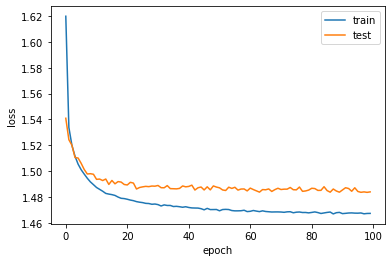

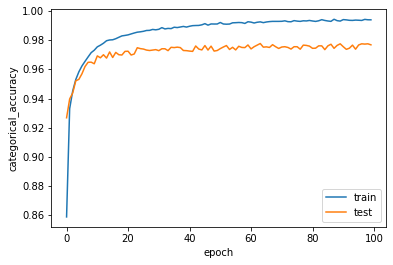

In [ ]:
n_metrics = len(history.history.keys())

print('Número de métricas armazenadas:', n_metrics)
print('Métricas:', history.history.keys())

# vamos fazer um loop sobre as métricas no histórico e fazer um gráfico pra cada uma delas
for metric_name in history.history.keys():
  if metric_name.startswith('val'):
    # se a métrica começa com "val" (ou seja, se refere ao conjunto de validação/testes), pula
    continue
  else:
    plt.plot(history.history[metric_name], label='train')            # métricas de treino
    plt.plot(history.history['val_' + metric_name], label='test')    # métricas de teste/validação 
    plt.ylabel(metric_name)
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

# Analise os gráficos acima e tente entender o que está acontencendo

*   Sinais de underfitting ou overfitting?
*   Melhorando ou piorando com o treinamento?
*   Treino e teste andando juntos, separados? Correlacionados ou anticorrelacionados?
*   Que testes fazer a mais? Precisa de mais testes?
*   Outras métricas, método de otimização, detalhes do método de otimização (hiperparâmetros como learning rate, batch size, ...)?
*   Taxas de erro, de acerto? Erra uniformemente entre as categorias?
*   https://en.wikipedia.org/wiki/Sensitivity_and_specificity
*   Você está feliz com os resultados?




---

## Hora de testar pra valer!

In [ ]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.fillStyle = "#FFFFFF";
ctx.fillRect(0, 0, canvas.width, canvas.height);
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

def draw(filename='drawing.png', w=300, h=300, line_width=15):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  #with open(filename, 'wb') as f:
  #  f.write(binary)
  return binary

#Escreva um número com o mouse

In [ ]:
img = draw(w=300, h=300, line_width=20)

In [ ]:
print('Este é seu número em PNG:')
print(img)

Este é seu número em PNG:
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x01,\x08\x06\x00\x00\x00y}\x8eu\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x13\xd5IDATx^\xed\x9d1\x93TE\x10\x80\xdfq\xc0QeYe\x01\xa2\x89b\xa6\xb1eJQd$\x06\xa6f\xe6\xfe\x053\xff\x82\xb9\xa1\t\x19\x91U\x06\x94\xa9e\x0c\x19dZ\xa0\x01\xd1\x1drw\xd6\x1c\x9c.\xcb\xee\xbe\x997\xdd3\xd3\xdd\xdfU\x111\xafg\xe6\xeb~\xdf\xce\xcc\xbe\xdd\xdd;===\x9d\xf8\x83\x00\x04 `\x80\xc0\x1e\xc22\x90%\x86\x08\x01\x08\x9c\x11@X\x14\x02\x04 `\x86\x00\xc22\x93*\x06\n\x01\x08 ,j\x00\x02\x100C\x00a\x99I\x15\x03\x85\x00\x04\x10\x165\x00\x01\x08\x98!\x80\xb0\xcc\xa4\x8a\x81B\x00\x02\x08\x8b\x1a\x80\x00\x04\xcc\x10@XfR\xc5@!\x00\x01\x84E\r@\x00\x02f\x08 ,3\xa9b\xa0\x10\x80\x00\xc2\xa2\x06 \x00\x013\x04\x10\x96\x99T1P\x08@\x00aQ\x03\x10\x80\x80\x19\x02\x08\xcbL\xaa\x18(\x04 \x80\xb0\xa8\x01\x08@\xc0\x0c\x01\x84e&U\x0c\x14\x02\x10@X\xd4\x00\x04 `\x86\x00\xc22\x93*\x06\n\x01\x08 ,j\x00\x02\x100C\x00a\x99I\x15\x03\x85\x00\x04\x10\x16

In [ ]:
# PIL é uma biblioteca para lidar com imagens
from PIL import Image, ImageOps
import io

Este é seu número de verdade (pro computador):
(28, 28) uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  25  81 109 141 146 146 146 129  22   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   6 153 238 255 255 255 255 255 255 255 209  31   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  15 169 255 252 183 126  98  76  76  83 193 255 166   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 151 255 229  68   0   0   0   0   0   0  39 252 212   3   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  35 180  75   0   0   0   0   0   0   0  15 235 226  10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9   0   0   0   0   0   0   0   0  16 237 226  10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 

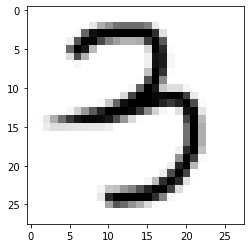

In [ ]:
image = ImageOps.grayscale(Image.open(io.BytesIO(img)))

img_array = np.array(ImageOps.invert(image.resize(img_shape)), dtype=x_train.dtype)

np.set_printoptions(linewidth=160)

print('Este é seu número de verdade (pro computador):')
print(img_array.shape, img_array.dtype)
print(img_array)

plt.imshow(img_array, cmap='gray_r', interpolation='none')

In [ ]:
result = model.predict_step(img_array.reshape((-1,) + img_shape)).numpy().ravel()

In [ ]:
print('Probabilidades:')
for label in labels:
  print('%d -> %5.2f %%' % (label, 100 * result[label]))

print('\nO modelo diz que você escreveu:', np.argmax(result))

Probabilidades:
0 ->  0.00 %
1 ->  0.00 %
2 ->  0.00 %
3 -> 100.00 %
4 ->  0.00 %
5 ->  0.00 %
6 ->  0.00 %
7 ->  0.00 %
8 ->  0.00 %
9 ->  0.00 %

O modelo diz que você escreveu: 3
